In [1]:
''' Latin hypercube design
Installation: pip install --upgrade pyDOE
https://pythonhosted.org/pyDOE/randomized.html

import sys
!{sys.executable} -m pip install --upgrade pyDOE

'''
import numpy as np
from matplotlib import pyplot as plt
import pyDOE as pyDOE

def rescale01(xmin, xmax, f):
    return (f - xmin) / (xmax - xmin)

np.random.seed(42)


In [2]:
num_evals = [32, 64, 128, 256, 512, 1024][0]  ## Total number of evaluations for training the emulator

#### Parameters -- replace this and the limits #####

####  para = np.linspace(lower_lim, upper_lim, total_eval)

para1 = np.linspace(0.0, 0.62036, num_evals)  #OmegaM
para2 = np.linspace(0.1841, 0.4159, num_evals) #Omegab
para3 = np.linspace(1.2886, 2.9114, num_evals) # sigma8

AllPara = np.vstack([para1, para2, para3])


[[0.5554729  0.63347966 0.23019881]
 [0.37340267 0.03612558 0.39638228]
 [0.22310918 0.9339754  0.89780019]
 [0.42000477 0.09439327 0.48500213]
 [0.01170438 0.41006369 0.31453286]
 [0.86322807 0.47849097 0.44558687]
 [0.63714617 0.29976296 0.25623981]
 [0.98628991 0.5057767  0.12405968]
 [0.04995808 0.46591626 0.8457362 ]
 [0.16198139 0.56060934 0.17264864]
 [0.06431511 0.6650292  0.28270158]
 [0.74959022 0.1316356  0.55921335]
 [0.69190388 0.59130857 0.56526539]
 [0.48945382 0.99284272 0.42172428]
 [0.66739854 0.22787952 0.96127453]
 [0.8847182  0.16575757 0.65089805]
 [0.33148578 0.74288265 0.02287481]
 [0.92617367 0.089568   0.72495987]
 [0.82370205 0.27453675 0.92100672]
 [0.75017257 0.37805225 0.83947198]
 [0.15101383 0.88516198 0.67320925]
 [0.11587727 0.81612091 0.68982971]
 [0.59987446 0.02970982 0.77208929]
 [0.5170847  0.19660091 0.13068203]
 [0.20099828 0.77548317 0.98418111]
 [0.58118437 0.71256866 0.08128484]
 [0.38451918 0.8053522  0.03612483]
 [0.29731983 0.31782888 0.20

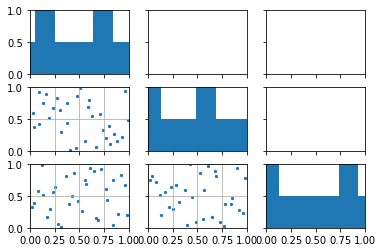

[[0.34019742 0.33364839 1.65503871]
 [0.22012774 0.19157742 1.91678065]
 [0.14008129 0.40094516 2.75435484]
 [0.26015097 0.20653226 2.07382581]
 [0.         0.28130645 1.81208387]
 [0.54031355 0.29626129 2.02147742]
 [0.40023226 0.25139677 1.7073871 ]
 [0.62036    0.30373871 1.44564516]
 [0.02001161 0.28878387 2.70200645]
 [0.10005806 0.31121613 1.55034194]
 [0.04002323 0.34112581 1.75973548]
 [0.4602671  0.21400968 2.17852258]
 [0.44025548 0.31869355 2.23087097]
 [0.30017419 0.4159     1.96912903]
 [0.42024387 0.23644194 2.85905161]
 [0.56032516 0.2214871  2.33556774]
 [0.20011613 0.35608065 1.2886    ]
 [0.58033677 0.19905484 2.4926129 ]
 [0.52030194 0.24391935 2.80670323]
 [0.48027871 0.27382903 2.64965806]
 [0.08004645 0.39346774 2.38791613]
 [0.06003484 0.3785129  2.44026452]
 [0.38022065 0.1841     2.54496129]
 [0.32018581 0.22896452 1.49799355]
 [0.12006968 0.36355806 2.9114    ]
 [0.36020903 0.34860323 1.39329677]
 [0.24013935 0.37103548 1.34094839]
 [0.18010452 0.25887419 1.60

In [3]:

lhd = pyDOE.lhs(AllPara.shape[0], samples=num_evals, criterion=None) # c cm corr m
print(lhd)
print
# lhd = norm(loc=0, scale=1).ppf(lhd)  # this applies to both factors here

##
f, a = plt.subplots(AllPara.shape[0], AllPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})

for i in range(AllPara.shape[0]):
    for j in range(i+1):
        print(i,j)
        if(i!=j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=64)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)


#plt.savefig('../Cl_data/Plots/LatinSq.png', figsize=(10, 10))
plt.show()


idx = (lhd * num_evals).astype(int)

AllCombinations = np.zeros((num_evals, AllPara.shape[0]))
for i in range(AllPara.shape[0]):
    AllCombinations[:, i] = AllPara[i][idx[:, i]]

np.savetxt('lhc_uniform3params_101.txt', AllCombinations)   #### no

print(AllCombinations)